<a href="https://colab.research.google.com/github/dindamareta/Mall-Customer-Clustering/blob/master/Mall_Costumer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator 2020*

Dinda Mareta Putriany
<br> DS0207

---

# *Mall Customer Segmentation-Clustering*

Clustering adalah metode pengelompokan data. Dalam arti lain sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompok yang tidak dikenal dalam data. <br> <br>

Pada tugas kali ini diberikan *Mal Customer Segmentation Datasets* dari https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python.

### *Import Library*

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### *Import Dataset*

Data memiliki 5 atribut. Berikut merupakan rincian dari *mall customer dataset*.
<br>
1. **CustomerID**: Nomor ID customer. <br>
2. **Gender**: Jenis kelamin customer.<br>
3. **Age**: Usia customer.  <br>
4. **Anual Income (k$)**: Pendapatan customer. <br>
5. **Spending Score (1-100)**: Skor untuk customer yang ditetapkan oleh mall berdasarkan perilaku. <br>

In [2]:
# Import Data 
df_mall = pd.read_csv('https://raw.githubusercontent.com/dindamareta/Mall-Customer-Clustering/master/Data/Mall_Customers.csv')

# Show 5 first Row
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Menampilkan Informasi Data

#### Menampilkan Informasi Umum

In [3]:
# Prints the Dataset Information
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari informasi di atas, diketahui bahwa terdapat 200 data dengan 2 tipe data yaitu numerik (7 atribut) dan objek (10 atribut).
- **Numerik**: CustomerID, Age, Annual Income (k$), dan Spending Score (1-100)
- **Objek**: Gender.


#### Menampilkan Informasi Berdasarkan Statistik

In [4]:
# Prints Descriptive Statistics
df_mall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## *Preprocessing* Data

Tujuannya adalah untuk membuat data menjadi ideal sebelum di proses. *Preprocessing* data dapat mengatasi beberapa masalah yaitu
1. Data Tidak Lengkap
    - Data hilang / Kosong
    - Kekurangan atribut tertentu atau atribut yang sesuai
    - Hanya berisi data agregat
2. Noise
    - Mengandung kesalahan
    - Mengandung data yang *outlier*
3. Tidak Konsisten
    - Mengandung perbedaan dalam kode atau nama

#### Mengecek Data Hilang/Kosong

Mengecek apakah terdapat data yang kosong atau tidak. Jika terdapat data kosong maka data tersebut akan diisi dengan median berdasarkan atributnya.

In [5]:
# Check for Missing Values
df_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Berdasarkan data di atas diketahui bahwa tidak terdapat data yang kosong dan siap digunakan, sehingga tidak perlu menghitung median.

#### Menghapus Data yang Tidak Diperlukan

Menghapus data yang tidak diperlukan untuk proses clustering. Disini data yang akan dihapus atau di drop adalah data dri atribut CustomerID

In [6]:
# Drop Atribute
df_mall.drop('CustomerID', axis=1, inplace=True)
df_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Eksplor Dataset

Tujuannya untuk mencari informasi-informasi yang ada pada data

In [7]:
df_mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Berdasarkan tabel di atas diketahui beberapa hal berikut.<br>
**Age**
* Usia termuda customer adalah 18 tahun
* Usia tertua customer adalah 70 tahun
* Rata-rata usia customer adalah 38 tahun

**Annual Income** 
* Pendapatan terendah customer adalah 15K
* Pendapatan terendah customer adalah 137K
* Rata-rata pendapatan customer adalah 60K

**Spending Score**
* Skor terendah customer adalah 1
* Skor tertinggi customer adalah 99
* Skor rata-rata customer adalah 50


Data akan dikelompokkan berdasarkan Gender (merupakan satu-satunya atribut yang bertipe objek) 

Female    112
Male       88
Name: Gender, dtype: int64




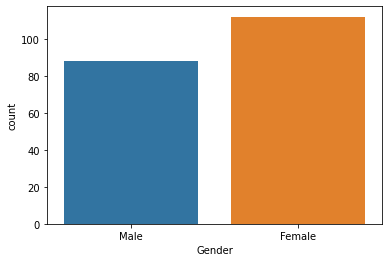

In [8]:
# Menghitung jumlah data pada atribut gender dan melihat perbandingannya
print(df_mall['Gender'].value_counts())
print('\n')
sns.countplot(x='Gender', data=df_mall)

Berdasarkan gambar diatas diketahui bahwa cutomer mall lebih banyak berjenis kelamin perempuan

Selanjutnya akan dilakukan perhitungan setiap atribut terhadap atribut Gender

###### **Age-Gender**

In [9]:
aged = pd.DataFrame()
aged['Male'] = (df_mall[df_mall['Gender'] == 'Male'][['Gender','Age']].describe())['Age']
aged['Female'] = (df_mall[df_mall['Gender'] == 'Female'][['Gender','Age']].describe())['Age']
aged.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


Berdasarkan tabel di atas diketahui bahwa.
* Baik customer laki-laki maupun perempuan memiliki usia termuda yaitu 18 tahun
* Usia tertua customer laki-laki 70 tahun dan perempuan 68 tahun
* Rata-rata usia customer laki-laki 39 tahun dan perempuan 38 tahun

###### **Annual Income-Gender**

In [10]:
annuald = pd.DataFrame()
annuald['Male'] = (df_mall[df_mall['Gender'] == 'Male'][['Gender','Annual Income (k$)']].describe())['Annual Income (k$)']
annuald['Female'] = (df_mall[df_mall['Gender'] == 'Female'][['Gender','Annual Income (k$)']].describe())['Annual Income (k$)']
annuald.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


Berdasarkan tabel di atas diketahui bahwa.
* Customer laki-laki memiliki pendapatan terendah sebanyak 15K dan perempuan sebanyak 16K
* Customer laki-laki memiliki pendapatan tertinggi sebanyak 137K dan perempuan sebanyak 126K
* Rata-rata pendapatan ustomer laki-laki sebanyak 62K dan perempuan sebanyak 59K

###### **Spending Score (1-100)-Gender**

In [11]:
scored = pd.DataFrame()
scored['Male'] = (df_mall[df_mall['Gender'] == 'Male'][['Gender','Spending Score (1-100)']].describe())['Spending Score (1-100)']
scored['Female'] = (df_mall[df_mall['Gender'] == 'Female'][['Gender','Spending Score (1-100)']].describe())['Spending Score (1-100)']
scored.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0


Berdasarkan tabel di atas diketahui bahwa.
* Customer laki-laki memiliki skor terendah sebanyak 1 dan perempuan sebanyak 5
* Customer laki-laki memiliki skor tertinggi sebanyak 97 dan perempuan sebanyak 99
* Rata-rata skor ustomer laki-laki sebanyak 48 dan perempuan sebanyak 51

#### Standardize


Melakukan standarisasi data untuk menyamakan rentang dan / atau variabilitas data. Standarisasi fitur menjadikan nilai setiap fitur dalam data memiliki mean nol (saat mengurangkan mean di pembilang) dan unit-varians.

In [12]:
df_drp = df_mall.copy()
df_drp.drop(['Gender','Age'], axis=1, inplace=True)
df_drp.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
df_sd = df_drp.copy()

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_sd.columns.tolist()
df_sd[column_names] = scaler.fit_transform(df_sd[column_names])
df_sd.sort_index(inplace=True)
df_sd.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Data Visualization

Langkah ini untuk melakukan visualisasi data yang dapat digunakan untuk menentukan cluster

Text(0, 0.5, 'Annual Spend')

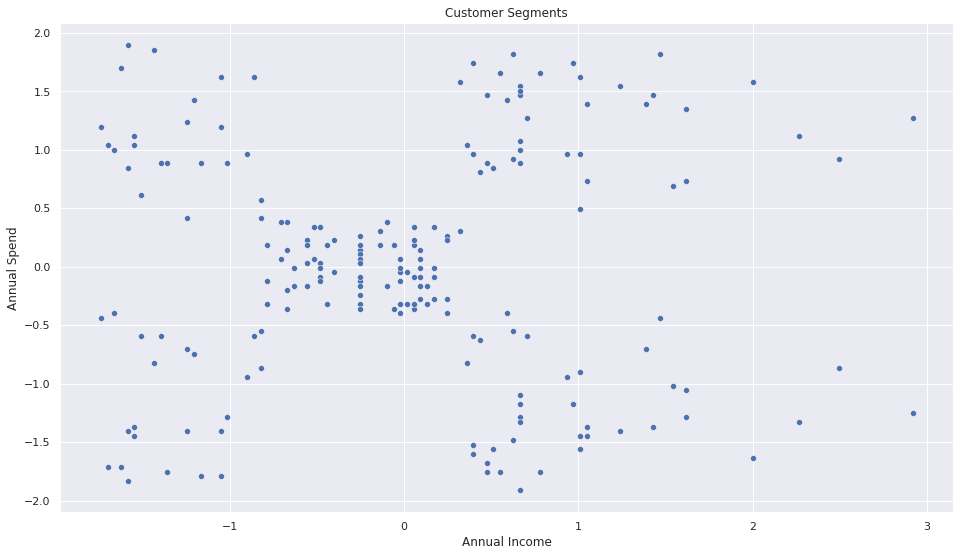

In [14]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_sd)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

## Metode Clustering

Clustering dilakukan dengan menggunakan metode K-Means dan Agglomerative.

### K-Means

Algoritma Kmeans adalah algoritma iteratif yang mencoba untuk mempartisi dataset menjadi subkelompok (cluster) non-overlapping berbeda yang ditentukan oleh Kpre dimana setiap titik data hanya dimiliki oleh satu kelompok. Ini mencoba untuk membuat titik data antar cluster semirip mungkin sambil juga menjaga cluster sejauh mungkin. Ini menetapkan poin data ke cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan pusat massa cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) minimal. Semakin sedikit variasi yang kita miliki dalam cluster, semakin homogen (serupa) titik data dalam cluster yang sama.

##### Mencari Nilai k Optimum

Berfungsi untuk menentukan nilai k yang paling optimal untuk digunakan pada K-means

###### **Elbow Method**

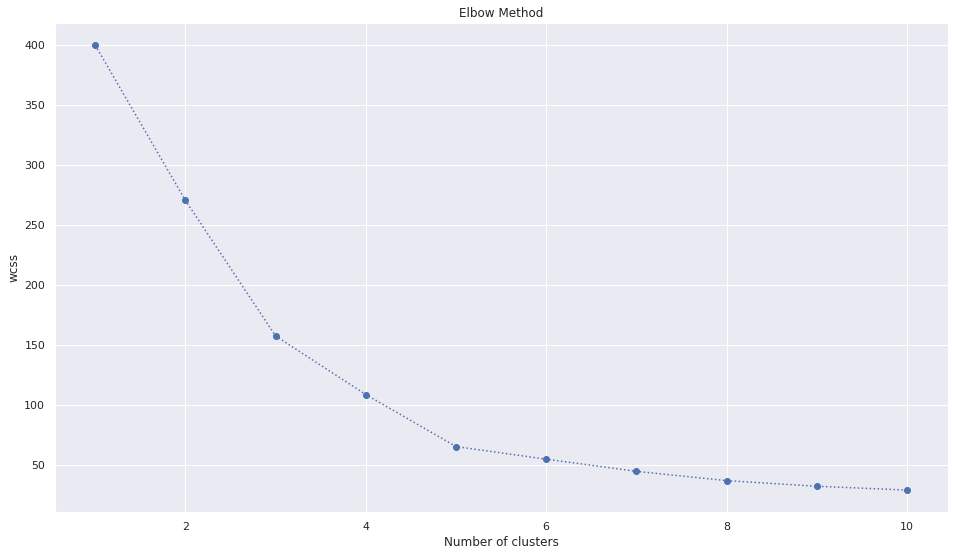

In [15]:
# Transform Data Frame to Numpy Array
mallcust = df_sd.to_numpy()

# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mallcust)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss,'o:')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Berdasarkan gambar di atas, maka nilai k optimum terdapat pada titik 5

###### **Silhoutte Method**

In [16]:
# Silhoutte Method
silsc = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(mallcust)
    label = kmeans.labels_
    sil_coeff = silhouette_score(mallcust, label, metric='euclidean')
    silsc.append(sil_coeff)
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3212707813918878
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5380630705007141
For n_clusters=7, The Silhouette Coefficient is 0.5263454490712252
For n_clusters=8, The Silhouette Coefficient is 0.45460807466743275
For n_clusters=9, The Silhouette Coefficient is 0.45338289123202313
For n_clusters=10, The Silhouette Coefficient is 0.44942277625588267


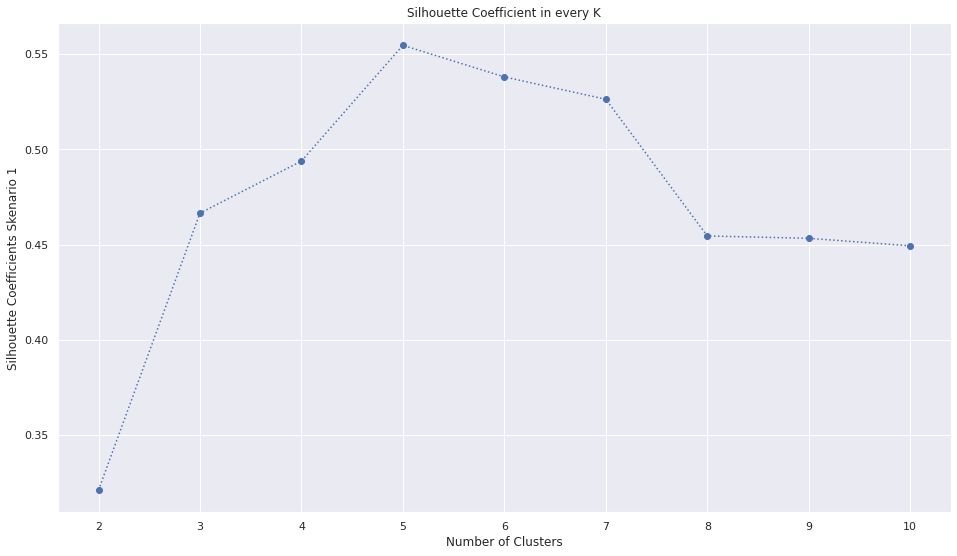

In [17]:
# Visualize
plt.plot(range(2,11),silsc,'o:')
plt.title("Silhouette Coefficient in every K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients Skenario 1")
plt.show()

Berdasarkan gambar di atas, maka nilai k optimum terdapat pada titik 5. <br> Sehingga k=5 (dari elbow method dan silhouette method)

##### Modeling K-Means

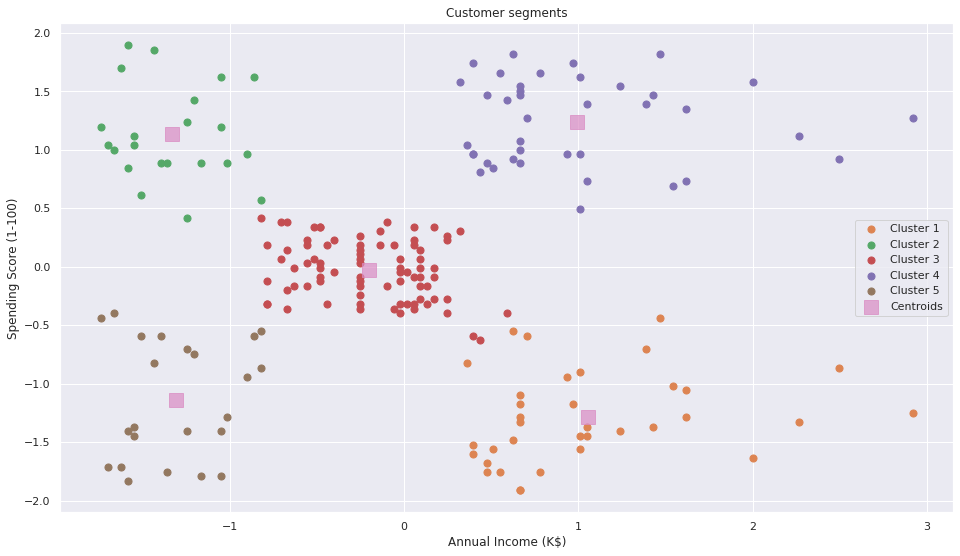

In [18]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(mallcust)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_sd)
plt.scatter(mallcust[cluster == 0, 0], mallcust[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(mallcust[cluster == 1, 0], mallcust[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(mallcust[cluster == 2, 0], mallcust[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(mallcust[cluster == 3, 0], mallcust[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(mallcust[cluster == 4, 0], mallcust[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Dapat dilihat pada gambar di atas bahwa K-Means berhasil melakukan clustering pada data dengan k=5.

## **Hierarchical Clustering**

Pengelompokan hierarki (juga disebut hierarchical cluster analysis atau HCA) adalah metode analisis klaster yang berupaya membangun hierarki klaster. Endpoint adalah sekumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara luas mirip satu sama lain.

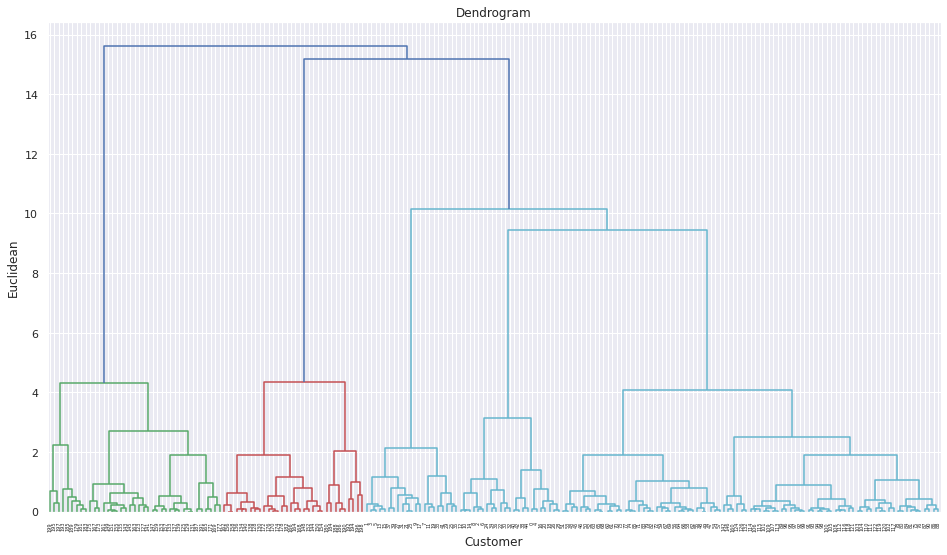

In [19]:
# Modeling and Visualizing Clusters by Dendogram
dend = sch.dendrogram(sch.linkage(mallcust, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

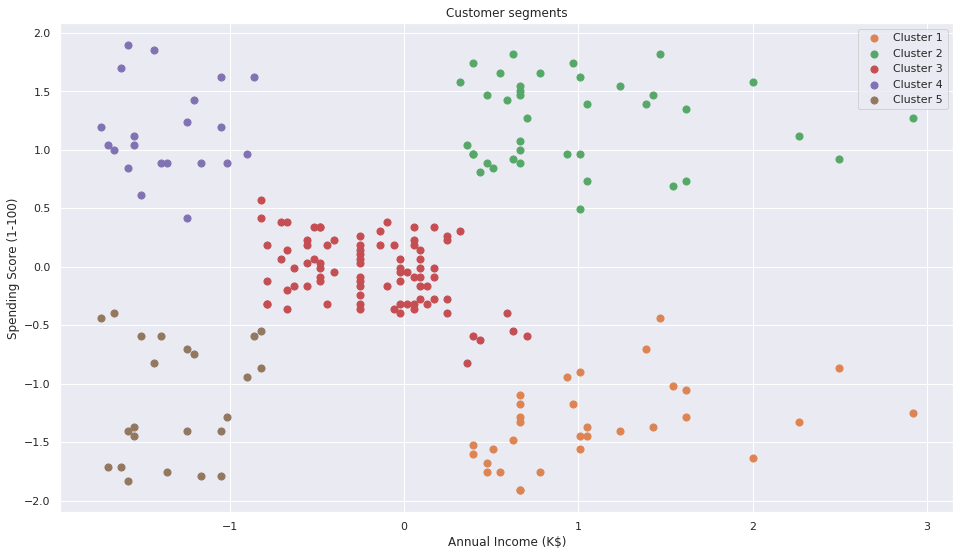

In [20]:
# Apply the Hierarchical Clustering Model to the Dataset
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(mallcust)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_sd)
plt.scatter(mallcust[hcluster == 0, 0], mallcust[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(mallcust[hcluster == 1, 0], mallcust[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(mallcust[hcluster == 2, 0], mallcust[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(mallcust[hcluster == 3, 0], mallcust[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(mallcust[hcluster == 4, 0], mallcust[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Customer segments')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Dapat dilihat pada gambar di atas bahwa Agglomerative Clustering dapat mengelompokkan data dengan menggunakan k=5.

###### Menambahkan Cluster pada Data

In [21]:
# Add Cluster Information to the Raw Data
df_mall['cluster'] = cluster
df_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4


In [24]:
# Save= Result
df_mall.to_csv('mall_clusters.csv', index=False)

## Kesimpulan

Berdasarkan hasil dari Elbow Method dan Silhouette Methode, k optimum didapatkan pada nilai 5 (k=5). Selain itu algoritma K-Means dan Agglomerative dapat menghasilkan cluster yang optimum dengan menggunakan nilai k tersebut.

Berikut merupakan data hasil clustering

2    81
3    39
0    35
4    23
1    22
Name: cluster, dtype: int64




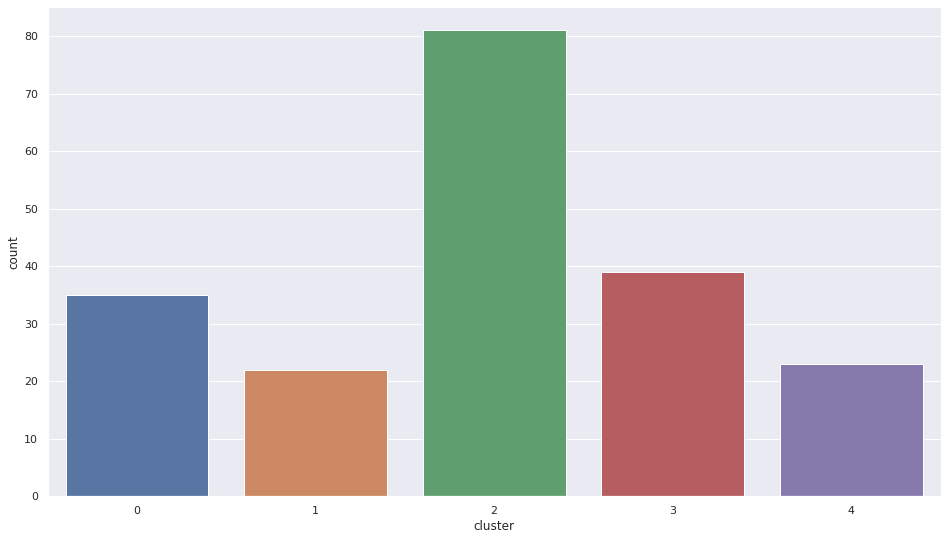

In [23]:
print(df_mall['cluster'].value_counts())
print('\n')
sns.countplot(x='cluster', data=df_mall)